In [1]:
import pandas as pd 
import warnings as wr 
wr.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [4]:
df.Gender = le.fit_transform(df[['Gender']])

In [5]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [6]:
df.tail()

,Gender,Height,Weight
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405
8554,0,60.921791,131.253738


# Go Ahead

In [8]:
df.shape

(8555, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   int64  
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 200.6 KB


In [10]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [11]:
df.describe()

,Gender,Height,Weight
count,8555.000000,8555.000000,8555.000000
mean,0.584454,66.809925,165.632735
std,0.492845,3.851454,32.043922
min,0.000000,54.616858,65.780000
25%,0.000000,63.957684,139.876803
50%,1.000000,66.985923,168.521567
75%,1.000000,69.604427,190.666305
max,1.000000,80.450000,269.989698


In [12]:
df.Gender.value_counts()

Gender
1    5000
0    3555
Name: count, dtype: int64

In [13]:
df.Gender.nunique()

2

# EDA

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

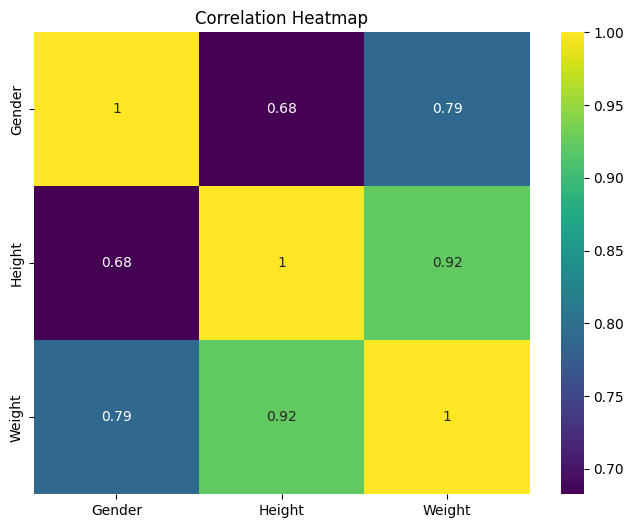

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()

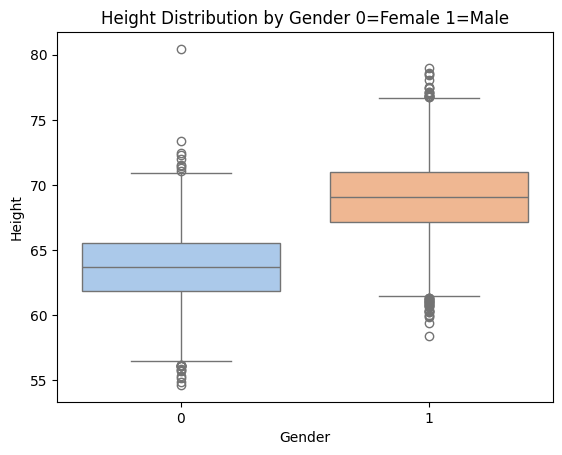

In [17]:
sns.boxplot(x='Gender', y='Height', data=df, palette='pastel')
plt.title("Height Distribution by Gender 0=Female 1=Male")
plt.show()

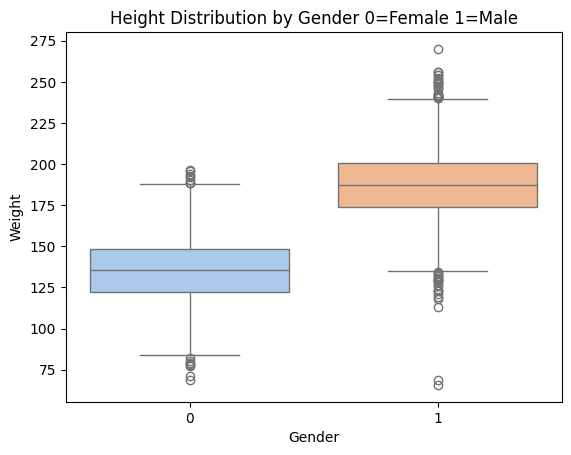

In [18]:
sns.boxplot(x='Gender', y='Weight', data=df, palette='pastel')
plt.title("Height Distribution by Gender 0=Female 1=Male")
plt.show()

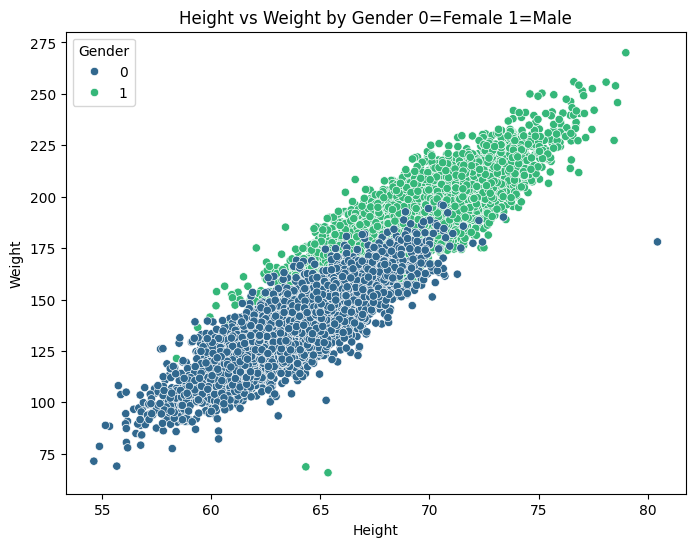

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=df, palette='viridis')
plt.title("Height vs Weight by Gender 0=Female 1=Male")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(title="Gender")
plt.show()

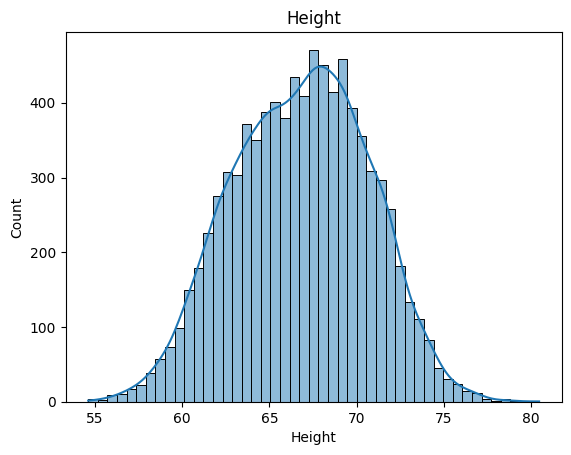

In [96]:
sns.histplot(df.Height, kde=True)
plt.title('Height')
plt.show()

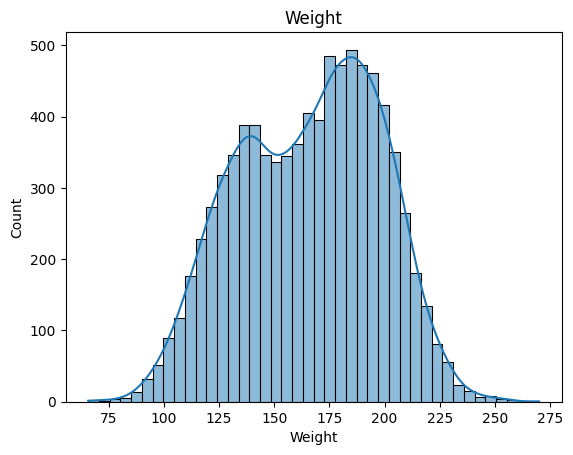

In [98]:
sns.histplot(df.Weight, kde=True)
plt.title('Weight')
plt.show()

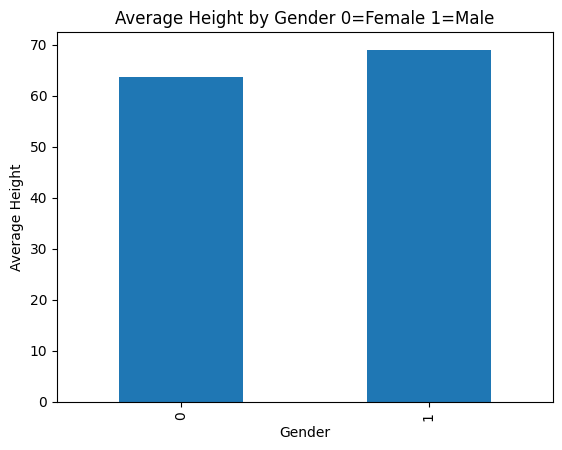

In [102]:
df.groupby('Gender')['Height'].mean().plot(kind='bar')
plt.title('Average Height by Gender 0=Female 1=Male')
plt.ylabel('Average Height')
plt.show()

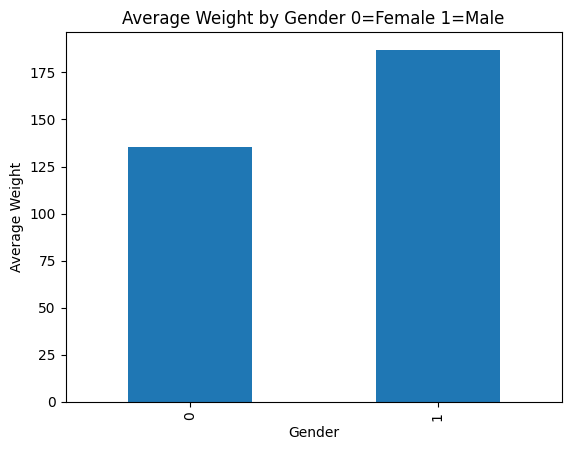

In [104]:
df.groupby('Gender')['Weight'].mean().plot(kind='bar')
plt.title('Average Weight by Gender 0=Female 1=Male')
plt.ylabel('Average Weight')
plt.show()

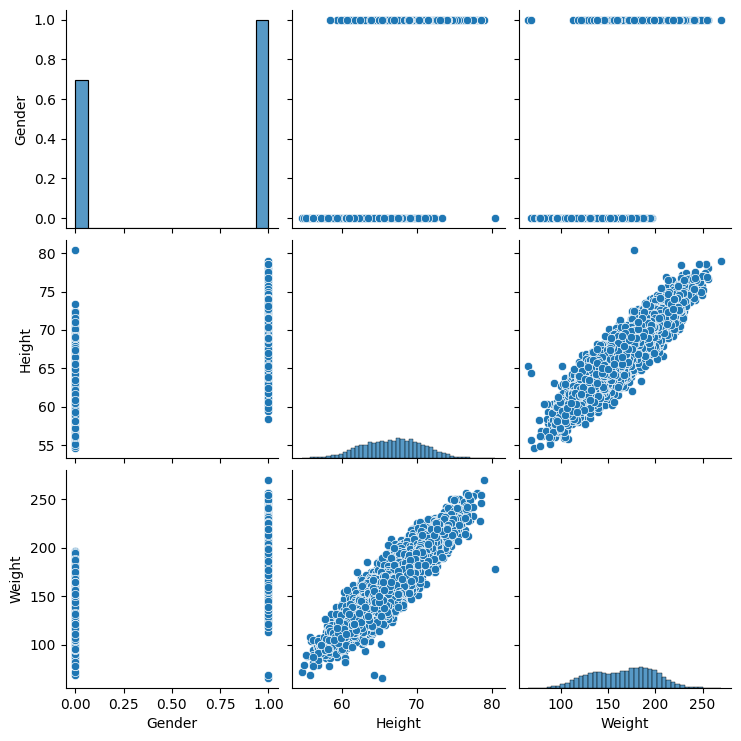

In [106]:
sns.pairplot(data=df)

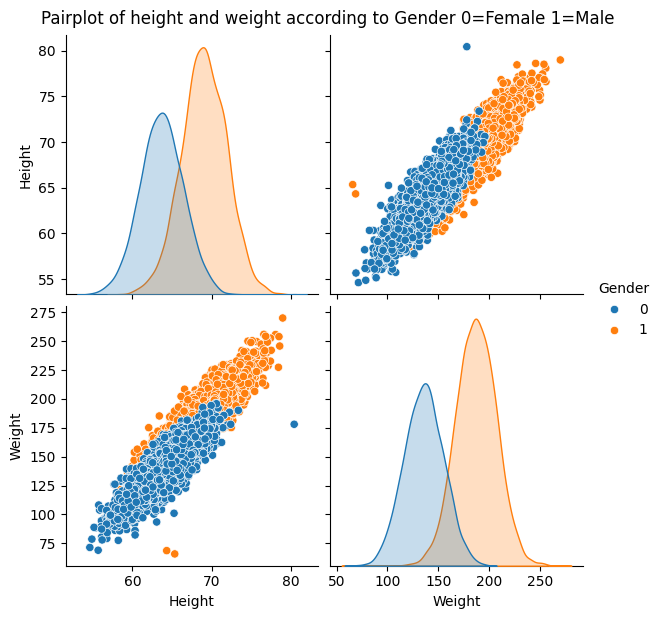

In [124]:
sns.pairplot(data=df, hue='Gender',height=3)
plt.suptitle('Pairplot of height and weight according to Gender 0=Female 1=Male',y=1.02)
plt.show()

# Least Squared Linear Regression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

df1 = df.copy()
df1.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [51]:
y = df1['Weight']
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [53]:
X = df1.drop(['Weight'], axis=1)
X.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [57]:
lin_reg = LinearRegression()

In [59]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [61]:
y_pred_lin_reg = lin_reg.predict(X_test)

In [63]:
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
mse_lin_reg

102.77238067868356

In [65]:
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
r2_lin_reg

0.9001352749393277

# Regression Problem

In [68]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

In [70]:
knn_reg = KNeighborsRegressor()

In [72]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [74]:
y_pred_knn_reg = knn_reg.predict(X_test)

In [76]:
mse_knn_reg = mean_squared_error(y_test, y_pred_knn_reg)
mse_knn_reg

125.12098797898079

In [78]:
r2_knn_reg = r2_score(y_test, y_pred_knn_reg)
r2_knn_reg

0.8784189586606289

# Classification Problem

In [80]:
df2 = df.copy()
df2.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [82]:
y_class = df2.Gender
y_class.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [84]:
X_class = df2.drop(['Gender'], axis  = 1)
X_class.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [86]:
X_train_class,X_test_class,y_train_class,y_test_class = train_test_split(X_class,y_class,test_size=0.2)

In [88]:
knn_class = KNeighborsClassifier()

In [90]:
knn_class.fit(X_train_class, y_train_class)

KNeighborsClassifier()

In [92]:
y_pred_knn_class = knn_class.predict(X_test_class)

In [94]:
accuracy_knn_class = accuracy_score(y_test_class, y_pred_knn_class)
accuracy_knn_class

0.9094097019286966